In [2]:
# Impoting Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [3]:
# Importing Data
df = pd.read_csv("Data/listings.csv")

In [4]:
print(df.shape)
print(df.columns)
df.head(3)

(447, 79)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20250609011619,2025-06-09,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20250609011619,2025-06-09,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.83,4.78,NaN,f,4,4,0,0,2.34
2,5651579,https://www.airbnb.com/rooms/5651579,20250609011619,2025-06-09,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.88,4.76,4.64,NaN,f,2,1,1,0,3.02


In [5]:
missing = df.isnull().sum()
sorted_missing_data = missing.sort_values(ascending=False)
print(sorted_missing_data[sorted_missing_data > 0])

license                         447
calendar_updated                447
neighbourhood_group_cleansed    447
neighbourhood                   249
neighborhood_overview           249
host_about                      206
host_location                   108
host_neighbourhood               71
last_review                      67
first_review                     67
review_scores_location           67
review_scores_accuracy           67
reviews_per_month                67
review_scores_value              67
review_scores_cleanliness        67
review_scores_communication      67
review_scores_checkin            67
review_scores_rating             67
beds                             32
bathrooms                        32
price                            32
estimated_revenue_l365d          32
host_response_rate               26
host_response_time               26
host_is_superhost                12
description                      10
host_acceptance_rate              8
has_availability            

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            447 non-null    int64  
 1   listing_url                                   447 non-null    object 
 2   scrape_id                                     447 non-null    int64  
 3   last_scraped                                  447 non-null    object 
 4   source                                        447 non-null    object 
 5   name                                          447 non-null    object 
 6   description                                   437 non-null    object 
 7   neighborhood_overview                         198 non-null    object 
 8   picture_url                                   447 non-null    object 
 9   host_id                                       447 non-null    int

In [7]:
df.describe(include="all")

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.470000e+02,447,4.470000e+02,447,447,447,437,198,447,4.470000e+02,...,380.000000,380.000000,380.000000,0.0,447,447.000000,447.000000,447.000000,447.0,380.000000
unique,NaN,447,NaN,1,2,447,395,157,441,NaN,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/1434112653259573474,NaN,2025-06-09,city scrape,Stylish Albany Room minutes to Downtown,Charming 5 room bed and breakfast located acro...,The Argus Hotel is located directly on Washing...,https://a0.muscache.com/pictures/miso/Hosting-...,NaN,...,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,447,415,1,5,11,4,NaN,...,NaN,NaN,NaN,NaN,353,NaN,NaN,NaN,NaN,NaN
mean,7.590596e+17,NaN,2.025061e+13,NaN,NaN,NaN,NaN,NaN,NaN,2.509316e+08,...,4.848237,4.664342,4.709789,NaN,NaN,6.243848,4.416107,1.827740,0.0,1.946526
std,5.182807e+17,NaN,3.910627e-03,NaN,NaN,NaN,NaN,NaN,NaN,2.002203e+08,...,0.321278,0.395802,0.422503,NaN,NaN,6.198586,5.700013,3.637663,0.0,1.966537
min,2.992450e+06,NaN,2.025061e+13,NaN,NaN,NaN,NaN,NaN,NaN,6.576000e+04,...,2.330000,2.330000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,0.0,0.040000
25%,5.311787e+07,NaN,2.025061e+13,NaN,NaN,NaN,NaN,NaN,NaN,4.762598e+07,...,4.850000,4.500000,4.670000,NaN,NaN,1.000000,1.000000,0.000000,0.0,0.477500
50%,9.289489e+17,NaN,2.025061e+13,NaN,NaN,NaN,NaN,NaN,NaN,2.329679e+08,...,4.960000,4.810000,4.830000,NaN,NaN,3.000000,2.000000,0.000000,0.0,1.255000
75%,1.192345e+18,NaN,2.025061e+13,NaN,NaN,NaN,NaN,NaN,NaN,4.306940e+08,...,5.000000,4.940000,4.942500,NaN,NaN,9.000000,6.000000,2.000000,0.0,2.850000


In [8]:
df["price"].head()

0     $70.00
1    $100.00
2     $75.00
3     $95.00
4     $86.00
Name: price, dtype: object

In [9]:
df["price"] = df["price"].str.replace("$", "").str.replace(",", "").astype(float)
print(df['price'].head())
print(df['price'].describe())

0     70.0
1    100.0
2     75.0
3     95.0
4     86.0
Name: price, dtype: float64
count     415.000000
mean      121.004819
std       126.004102
min        24.000000
25%        68.000000
50%        93.000000
75%       131.500000
max      1486.000000
Name: price, dtype: float64


In [10]:
# Drop unnecessary columns with 100% missing data
df.drop(['license', 'calendar_updated', 'neighbourhood_group_cleansed'], axis=1, inplace=True)
print(df.shape)

(447, 76)


In [11]:
# Text Fields - Replace with placeholders for consistency
text_cols = ['neighbourhood', 'neighborhood_overview', 'host_about', 'host_location', 
             'host_neighbourhood', 'description', 'host_response_rate', 
             'host_response_time', 'host_acceptance_rate']
for col in text_cols:
    df[col] = df[col].fillna('Unknown').astype(str)

# Reviews - Leave as NaN to indicate no reviews (Intentional)


# Critical Numeric Fields - Drop or impute
critical_numeric = ['beds', 'bathrooms', 'price', 'estimated_revenue_l365d', 'reviews_per_month', 'bedrooms']
for col in critical_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isna().mean() < 0.05:
        df.dropna(subset=[col], inplace=True)
    else:
        df[col] = df[col].fillna(df[col].median())

# host_is_superhost - Boolean, conservative assumption False
df['host_is_superhost'] = df['host_is_superhost'].fillna(False).astype(bool)

# has_availability - Treat missing as False
df['has_availability'] = df['has_availability'].fillna(False).astype(bool)

print(df.isna().sum())


id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 76, dtype: int64


In [12]:
df.to_csv("Data/listings_clean.csv", index=False)

In [13]:
df1 = pd.read_csv("Data/listings_clean.csv")

In [14]:
username = 'postgres'     
password = '12345678' 
host = 'localhost'
port = '5432'
database = 'airbnb_project'


engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')


df1.to_sql('airbnb_albany', engine, if_exists='replace', index=False)

12

# Analytics

### Distribution of Performance Score

In [15]:
cols = ['review_scores_rating', 'number_of_reviews', 'review_scores_accuracy',  'estimated_revenue_l365d', 'review_scores_cleanliness', 'bathrooms',
        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price', 'bedrooms', 'beds']
per = df1[cols].apply(lambda c: (c - c.min())*100 / (c.max() - c.min()))

df1["performance_score"] = per.mean(axis=1)
# Flag bottom 25 % as under performers
threshold = df1["performance_score"].quantile(0.25)
df1["under_performer"] = (df1["performance_score"] <= threshold)


In [16]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

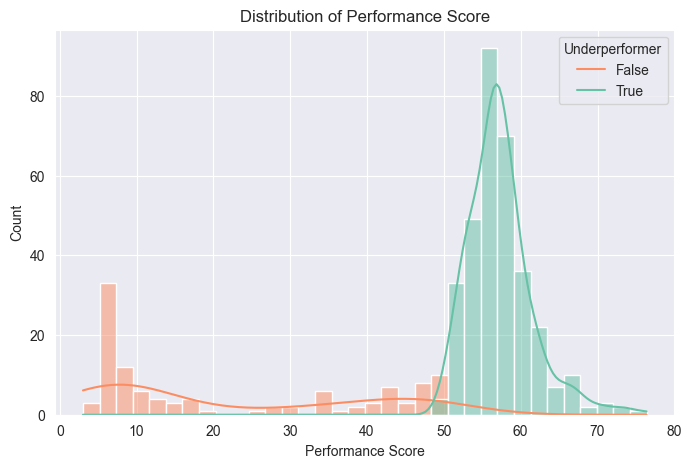

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(data=df1, x="performance_score", hue="under_performer", kde=True)

plt.xlabel("Performance Score")
plt.title("Distribution of Performance Score")
plt.legend(title="Underperformer", labels=["False", "True"])

Graphs shows that while most of Airbnb strong listings deliver steady performance, there’s a significant chunk struggling — and within that struggling group, some are severely underperforming. That signals an opportunity to step in, figure out what’s holding those listings back — whether it's poor reviews, pricing, lack of amenities — and provide targeted improvements.

At the same time, we can look at the best performers and understand what they’re doing right, then try to replicate those factors across weaker listings. It’s also worth noting that this performance score helps us quickly flag problem areas and monitor overall quality, which is critical for improving guest satisfaction and maintaining platform standards.


### Performance Score by Property Type

In [18]:
df1["property_type"].value_counts()

property_type
Entire rental unit                   214
Entire home                           72
Private room in home                  64
Private room in rental unit           28
Room in hotel                         15
Entire townhouse                      12
Entire condo                           7
Entire vacation home                   4
Private room in guest suite            4
Private room in bed and breakfast      4
Entire loft                            4
Entire guest suite                     3
Entire place                           2
Private room in townhouse              2
Entire serviced apartment              1
Room in aparthotel                     1
Entire cottage                         1
Entire guesthouse                      1
Private room in villa                  1
Private room in guesthouse             1
Private room in condo                  1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Private room in guest suite'),
  Text(1, 0, 'Entire townhouse'),
  Text(2, 0, 'Entire home'),
  Text(3, 0, 'Entire rental unit'),
  Text(4, 0, 'Entire condo'),
  Text(5, 0, 'Private room in bed and breakfast'),
  Text(6, 0, 'Private room in home'),
  Text(7, 0, 'Entire vacation home'),
  Text(8, 0, 'Private room in rental unit'),
  Text(9, 0, 'Room in hotel')])

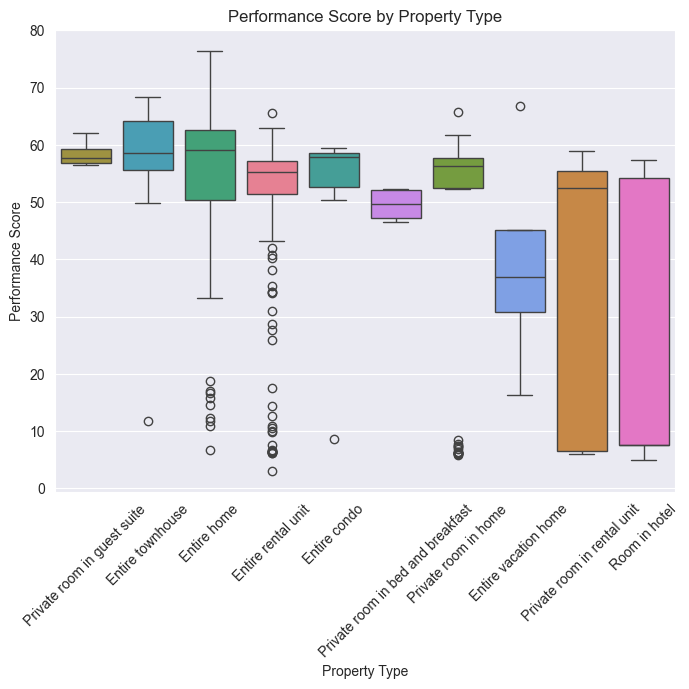

In [19]:
plt.figure(figsize=(8,6))
top_10_types = df1['property_type'].value_counts().head(10).index
df1_filtered = df1[df1['property_type'].isin(top_10_types)]
order = df1_filtered.groupby("property_type")["performance_score"].mean().sort_values(ascending=False).index
sns.boxplot(data=df1_filtered, x="property_type", y="performance_score", order=order, hue="property_type")

plt.xlabel("Property Type")
plt.ylabel("Performance Score")
plt.title("Performance Score by Property Type")
plt.xticks(rotation=45)

 Entire Rental Units dominate the dataset with 214 listings, which means their performance spread gives a more reliable picture — and what we see there is a wide range, with both high performers and a lot of listings pulling the average down, including several with very low performance scores. That suggests inconsistency — some rental units excel, but many need quality improvement.

 Entire Homes and Private Rooms in Homes have decent representation too, 72 and 64 listings respectively, with simmilar high median but incosistency from several low scores.

 For smaller categories, I'd recommend gathering more data before making firm decisions, but they could still be flagged for further monitoring or targeted quality checks.

### Performance Score Distribution by Price Ranges

In [20]:
df1["price"].describe()

count     442.000000
mean      119.294118
std       122.270413
min        24.000000
25%        70.000000
50%        93.000000
75%       128.000000
max      1486.000000
Name: price, dtype: float64

Text(0.5, 0, 'Performance Score')

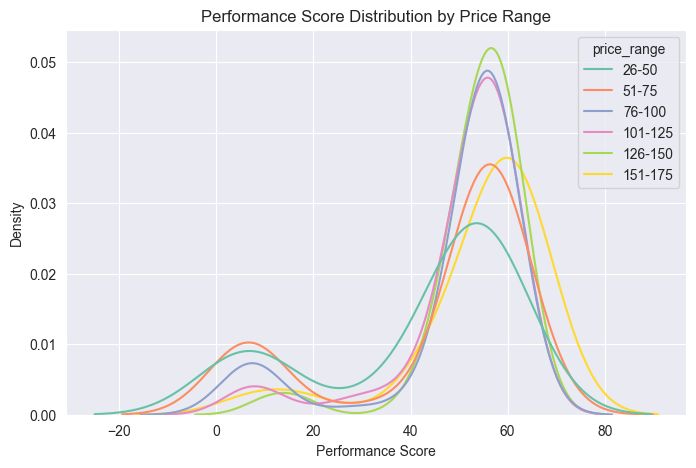

In [21]:
plt.figure(figsize=(8,5))
df1["price_range"] = pd.cut(df1["price"], bins=[25,50,75,100,125,150,175], labels=["26-50", "51-75", "76-100", "101-125", "126-150", "151-175"])
sns.kdeplot(data=df1, x="performance_score", hue="price_range", common_norm=False)
plt.title("Performance Score Distribution by Price Range")
plt.xlabel("Performance Score")

Chart shows that if targeting value-conscious consumers, focus your product development and marketing around the 101–150 price range, where performance is strong and consistent. For premium segments, ensure that higher prices are backed by features or brand value—since performance alone may not justify the cost. For lower-tier products, consider quality improvements or clearer communication to help reduce uncertainty in performance.

### Underperformes by property type, price range and host listing counts

In [22]:
df1["host_listings_count"].value_counts().sort_values(ascending=False)

host_listings_count
1       94
2       64
3       43
8       31
4       25
24      22
9       18
19      18
17      17
6       17
16      16
12      12
11      12
14      11
5       10
10       9
7        8
1237     5
652      5
2159     3
13       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Underperformer Ratio by Host Listings Count')

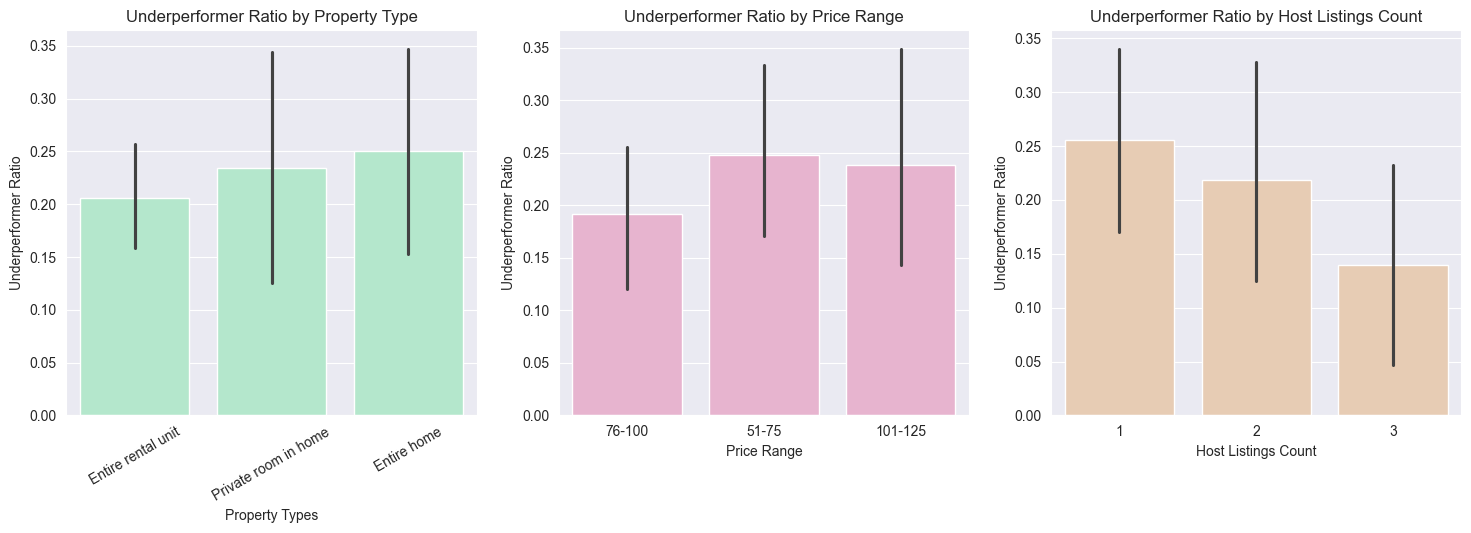

In [23]:
top_3_types = df1['property_type'].value_counts().head(3).index
df1_filtered_types = df1[df1['property_type'].isin(top_3_types)]

top_3_prices = df1['price_range'].value_counts().head(3).index
df1_filtered_price = df1[df1['price_range'].isin(top_3_prices)]
df1_filtered_price.loc[:, 'price_range'] = pd.Categorical(df1_filtered_price['price_range'], categories=top_3_prices)

top_3_hlc = df1['host_listings_count'].value_counts().sort_values(ascending=False).head(3).index
df1_filtered_hlc = df1[df1['host_listings_count'].isin(top_3_hlc)]

gig, ax=plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=df1_filtered_types,
 x="property_type",
 y="under_performer",
 estimator=np.mean,
 ax=ax[0],
 color="#abefcb")
ax[0].set_xlabel("Property Types")
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)
ax[0].set_ylabel("Underperformer Ratio")
ax[0].set_title("Underperformer Ratio by Property Type")
sns.barplot(data=df1_filtered_price,
 x="price_range",
 y="under_performer",
 estimator=np.mean,
 ax=ax[1],
 color="#efabd0",
 order=top_3_prices)
ax[1].set_xlabel("Price Range")
ax[1].set_ylabel("Underperformer Ratio")
ax[1].set_title("Underperformer Ratio by Price Range")
sns.barplot(data=df1_filtered_hlc,
 x="host_listings_count",
 y="under_performer",
 estimator=np.mean,
 ax=ax[2],
 color="#efcbab")
ax[2].set_xlabel("Host Listings Count")
ax[2].set_ylabel("Underperformer Ratio")
ax[2].set_title("Underperformer Ratio by Host Listings Count")

 Graphs show underperformer ratios with 95% confidence intervals, if Airbnb wants to reduce underperformance, they should prioritize entire rental units, as they show the most stable results. Focus investments or recommendations around the 76–100 price range, where performance is most reliable. And perhaps most importantly, partner with or promote hosts who manage multiple listings—the data shows they consistently deliver better outcomes.

# Airbnb Reviews Analysis


In [1]:
# Load and inspect the reviews data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reviews = pd.read_csv('Data/reviews.csv')
print(reviews.shape)
print(reviews.columns)
reviews.head()

(25991, 6)
Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2992450,15066586,2014-07-01,16827297,Kristen,Large apartment; nice kitchen and bathroom. Ke...
1,2992450,21810844,2014-10-24,22648856,Christopher,"This may be a little late, but just to say Ken..."
2,2992450,27434334,2015-03-04,45406,Altay,The apartment was very clean and convenient to...
3,2992450,28524578,2015-03-25,5485362,John,Kenneth was ready when I got there and arrange...
4,2992450,35913434,2015-06-23,15772025,Jennifer,We were pleased to see how 2nd Street and the ...


In [2]:
# Clean the reviews data
reviews['date'] = pd.to_datetime(reviews['date'], errors='coerce')
reviews['comments'] = reviews['comments'].fillna('')
reviews['review_length'] = reviews['comments'].apply(len)
print(reviews.isna().sum())
reviews.head()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
review_length    0
dtype: int64


,listing_id,id,date,reviewer_id,reviewer_name,comments,review_length
0,2992450,15066586,2014-07-01,16827297,Kristen,Large apartment; nice kitchen and bathroom. Ke...,376
1,2992450,21810844,2014-10-24,22648856,Christopher,"This may be a little late, but just to say Ken...",492
2,2992450,27434334,2015-03-04,45406,Altay,The apartment was very clean and convenient to...,197
3,2992450,28524578,2015-03-25,5485362,John,Kenneth was ready when I got there and arrange...,1242
4,2992450,35913434,2015-06-23,15772025,Jennifer,We were pleased to see how 2nd Street and the ...,1288


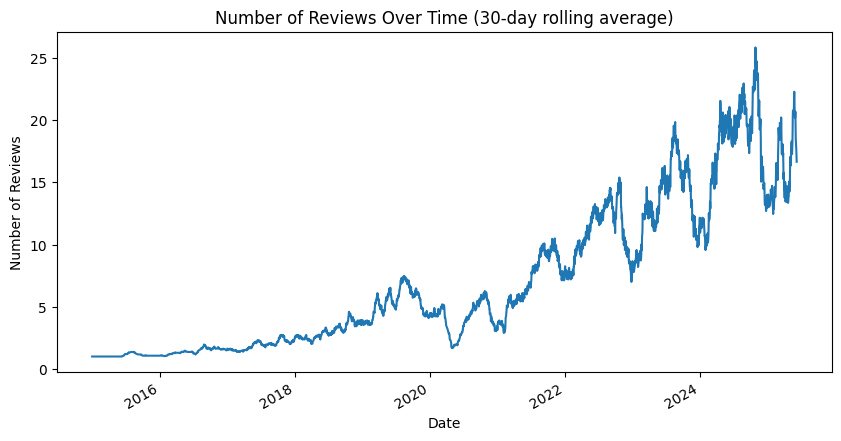

In [3]:
# Number of reviews over time
reviews_by_date = reviews.groupby('date').size()
plt.figure(figsize=(10,5))
reviews_by_date.rolling(30).mean().plot()
plt.title('Number of Reviews Over Time (30-day rolling average)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

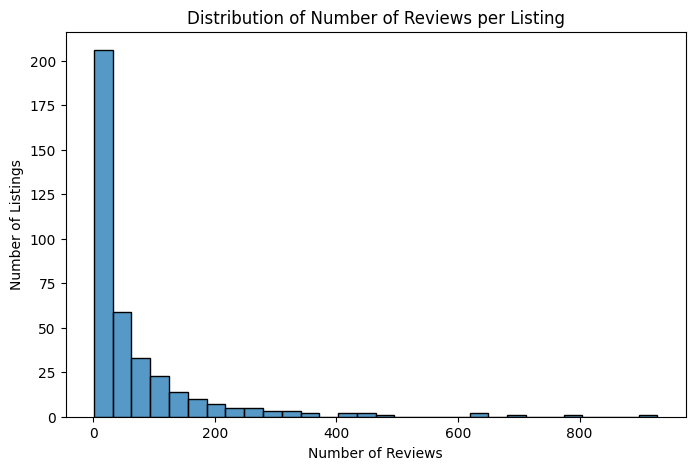

In [4]:
# Reviews per listing (histogram)
plt.figure(figsize=(8,5))
reviews_per_listing = reviews['listing_id'].value_counts()
sns.histplot(reviews_per_listing, bins=30, kde=False)
plt.title('Distribution of Number of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.show()

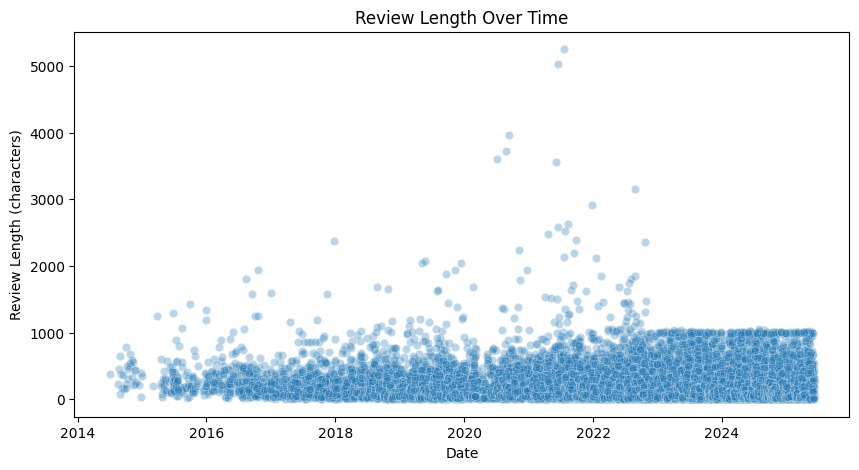

In [5]:
# Scatter plot: review length vs. review date
plt.figure(figsize=(10,5))
sns.scatterplot(data=reviews, x='date', y='review_length', alpha=0.3)
plt.title('Review Length Over Time')
plt.xlabel('Date')
plt.ylabel('Review Length (characters)')
plt.show()

In [6]:
# Compute and display key statistics for Airbnb reviews
total_reviews = len(reviews)
unique_listings = reviews['listing_id'].nunique()
avg_review_length = reviews['review_length'].mean()
most_active_reviewers = reviews['reviewer_name'].value_counts().head(5)
most_reviewed_listings = reviews['listing_id'].value_counts().head(5)
review_length_desc = reviews['review_length'].describe()
first_review = reviews['date'].min()
last_review = reviews['date'].max()
missing_data = reviews.isna().sum()

print(f"Total number of reviews: {total_reviews}")
print(f"Number of unique listings reviewed: {unique_listings}")
print(f"Average review length: {avg_review_length:.1f} characters")
print("\nMost active reviewers:")
print(most_active_reviewers)
print("\nMost reviewed listings (listing_id: count):")
print(most_reviewed_listings)
print("\nReview length statistics:")
print(review_length_desc)
print(f"\nFirst review date: {first_review}")
print(f"Last review date: {last_review}")
print("\nMissing data per column:")
print(missing_data)

Total number of reviews: 25991
Number of unique listings reviewed: 380
Average review length: 196.5 characters

Most active reviewers:
reviewer_name
Michael     267
John        200
David       187
Daniel      158
Jennifer    157
Name: count, dtype: int64

Most reviewed listings (listing_id: count):
listing_id
25549565    928
10768745    792
28722270    691
28868857    628
9005989     620
Name: count, dtype: int64

Review length statistics:
count    25991.000000
mean       196.485245
std        209.631387
min          0.000000
25%         67.000000
50%        137.000000
75%        255.000000
max       5254.000000
Name: review_length, dtype: float64

First review date: 2014-07-01 00:00:00
Last review date: 2025-06-08 00:00:00

Missing data per column:
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
review_length    0
dtype: int64


# Final Insights and Recommendations

## Key Insights
- **Listing Performance**: Most listings perform steadily, but a significant portion underperform. Entire rental units dominate the market, but show wide variability—some excel, many need improvement. Private rooms and homes also have inconsistent results.
- **Price Ranges**: Listings in the 76–100 and 101–150 price ranges show the most reliable and consistent performance. Lower and higher price segments are more variable and may need targeted strategies.
- **Host Experience**: Hosts with multiple listings consistently deliver better outcomes, suggesting experience and scale matter.
- **Reviews Analysis**: Review activity is steady over time, with a wide range of review lengths. Some listings and reviewers are much more active than others, and most feedback is positive but varies in detail.

## Actions for Improvement
1. **Target Underperformers**: Identify and support listings with low performance scores—offer training, resources, or incentives to improve quality, amenities, and guest experience.
2. **Focus on Consistent Price Segments**: Prioritize marketing and product development for the 76–150 price range, where guest satisfaction is most reliable.
3. **Leverage Experienced Hosts**: Encourage new hosts to learn from or partner with experienced, multi-listing hosts. Consider mentorship programs or highlight top hosts in the platform.
4. **Quality Control for Entire Units**: Since entire units are the largest and most variable segment, implement stricter quality checks and provide improvement guidelines.
5. **Review Feedback Loop**: Use review data to flag recurring issues (e.g., cleanliness, noise, amenities) and provide actionable feedback to hosts. Encourage longer, more detailed reviews for better insights.
6. **Monitor and Support Smaller Segments**: For less common property types, gather more data and monitor for unique issues or opportunities.

By acting on these insights, Airbnb can improve guest satisfaction, boost listing quality, and drive better outcomes for both hosts and the platform overall.